In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("titanic_dataset.csv")

In [3]:
data.shape

(418, 12)

In [4]:
data.nunique()

PassengerId    418
Survived         2
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

In [5]:
data.drop(["PassengerId","Name","Ticket","Cabin"],axis=1,inplace=True)

In [6]:
features_with_na=[features for features in data.columns if data[features].isnull().sum()>1]

for feature in features_with_na:
    print(feature, np.round(data[feature].isnull().mean(), 4),  ' % missing values')

Age 0.2057  % missing values


In [7]:
data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [8]:
# list of numerical variables
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
data[numerical_features].head()

Number of numerical variables:  6


,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,34.5,0,0,7.8292
1,1,3,47.0,1,0,7.0000
2,0,2,62.0,0,0,9.6875
3,0,3,27.0,0,0,8.6625
4,1,3,22.0,1,1,12.2875


In [9]:

discrete_feature=[feature for feature in numerical_features if len(data[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 4


In [10]:
discrete_feature

['Survived', 'Pclass', 'SibSp', 'Parch']

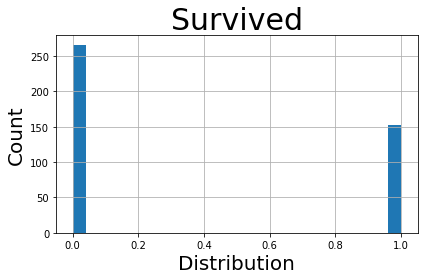

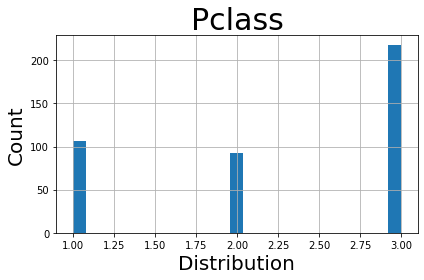

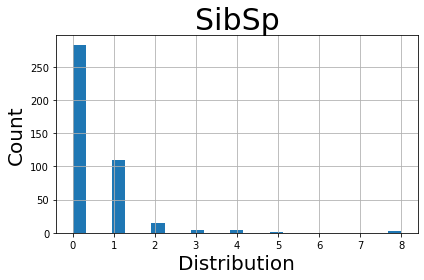

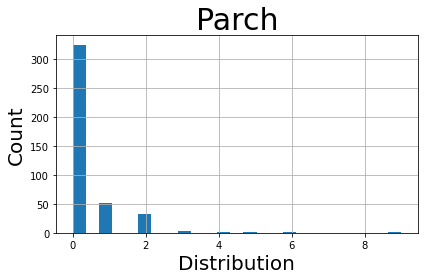

In [11]:
for feature in discrete_feature:
    data2=data.copy()
    data2[feature].hist(bins=25)
    plt.xlabel("Distribution",size=20)
    plt.ylabel("Count",size=20)
    plt.title(feature,size=30)
    plt.tight_layout()
    #plt.style_use("fivethirtyeight")
    plt.show()

In [12]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 2


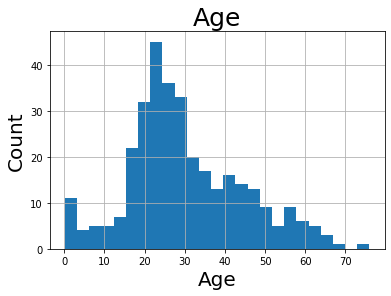

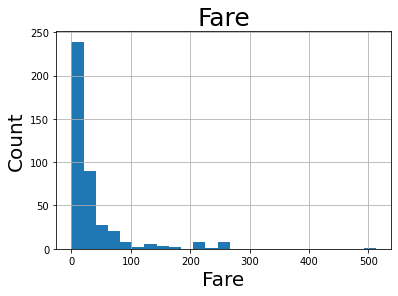

In [13]:
for feature in continuous_feature:
    data2=data.copy()
    data2[feature].hist(bins=25)
    #plt(figsize=(8, 6))
    plt.xlabel(feature,size=20)
    plt.ylabel("Count",size=20)
    plt.title(feature,size=25)
    plt.show()

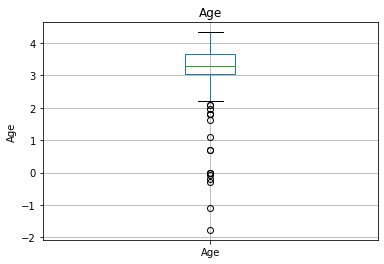

In [14]:
for feature in continuous_feature:
    data2=data.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data2[feature]=np.log(data2[feature])
        data2.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [15]:
categorical_features=[feature for feature in data.columns if data[feature].dtypes=='O']
categorical_features

['Sex', 'Embarked']

In [16]:
target="Survived"

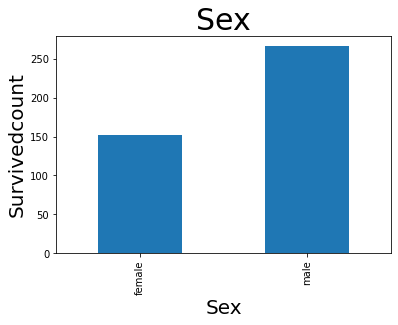

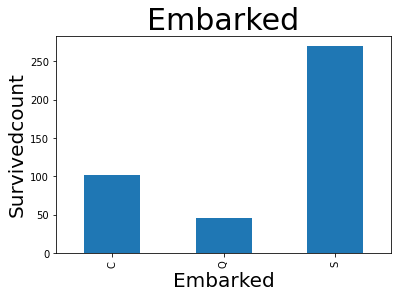

In [17]:
for feature in categorical_features:
    data2=data.copy()
    data2.groupby(feature)[target].count().plot.bar()
    plt.xlabel(feature,size=20)
    plt.ylabel(target + "count",size=20)
    plt.title(feature,size=30)
    plt.show()

In [18]:
--------------------------------------

SyntaxError: invalid syntax (<ipython-input-18-105e8fb715bf>, line 1)

In [ ]:
-----------------------------------------------

In [ ]:
data.isna().sum()

In [ ]:
data.nunique()

In [ ]:
data.drop(["PassengerId","Name","Ticket","Cabin"],axis=1,inplace=True)

In [ ]:
categorical_columns=['Survived', 'Pclass', 'Sex','SibSp', 'Parch','Embarked']

In [ ]:
for i in categorical_columns:
    data[i]=data[i].astype("category")

In [ ]:
data.dtypes

In [ ]:
data["Age"]=data["Age"].fillna(data["Age"].mean())

In [ ]:
data["Fare"]=data["Fare"].fillna(data["Fare"].mean())

In [ ]:
data.dtypes

In [ ]:
result2 = data.select_dtypes(include='category')
result2

In [ ]:
result = data.select_dtypes(include='number')
result

In [ ]:
import seaborn as sns

In [ ]:
for feature in result2:
    data2=data.copy()
    data2[feature].hist(bins=25)
    plt.xlabel("Distribution",size=20)
    plt.ylabel("Count",size=20)
    plt.title(feature,size=25)
    plt.tight_layout()
    #plt.style_use("fivethirtyeight")
    plt.show()

In [ ]:
for feature in result:
    data2=data.copy()
    data2[feature].hist(bins=25)
    #plt(figsize=(8, 6))
    plt.xlabel(feature,size=20)
    plt.ylabel("Count",size=20)
    plt.title(feature,size=25)
    plt.show()

In [ ]:
data.nunique()

In [ ]:
color_list=["blue","orange","green","red","purple","brown","pink","gray","olive","cyan"]

In [ ]:
def visualize(df):
    features=list(df.select_dtypes(include=[np.number]).columns.values)
    feature_size=len(features)
    fig, axes=plt.subplots(nrows=int(np.ceil(feature_size/2)),
                           ncols=2, 
                           figsize=(14, feature_size*2), 
                           dpi=80, 
                           facecolor="w",
                          edgecolor="k")
    for i in range(feature_size): 
        key=features[i]
        c=color_list[i% (len(color_list))]
        t_data=data[key]
        t_data.head()
        ax=t_data.plot(ax=axes[i//2, i%2],
                      color=c,
                      title="{}".format(key),
                      rot=25)
        ax.legend([key])
    plt.tight_layout()
    

In [ ]:
visualize(result)

In [ ]:
def visualize(df):
    features=list(df.select_dtypes(include=[np.object]).columns.values)
    feature_size=len(features)
    fig, axes=plt.subplots(nrows=int(np.ceil(feature_size/2)),
                           ncols=2, 
                           figsize=(14, feature_size*2), 
                           dpi=80, 
                           facecolor="w",
                          edgecolor="k")
    for i in range(feature_size): 
        key=features[i]
        c=color_list[i% (len(color_list))]
        t_data=data[key]
        t_data.head()
        ax=t_data.plot(ax=axes[i//2, i%2],
                      color=c,
                      title="{}".format(key),
                      rot=25)
        ax.legend([key])
    plt.tight_layout()

In [ ]:
visualize(data)